In [1]:
# Imports
import tensorflow as tf
from city_sustainability.models import unet_model
from city_sustainability.preprocessing import image_resize
from city_sustainability.loading_data import loading_paths, image_and_label_arrays

2023-05-23 21:42:58.946922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 21:42:59.225904: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 21:42:59.227551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 21:43:00.409165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Retrieve image_paths and label_paths
data_path_1 = '../../raw_data/OpenEarthMap_wo_xBD'
image_paths, label_paths = loading_paths(data_path_1)

In [3]:
# Check length of image_paths
len(image_paths)

2687

In [4]:
# Check length of label_paths
len(label_paths)

2687

In [5]:
# Import all image array as X and label array as y

X, y = image_and_label_arrays(image_paths, label_paths)

In [6]:
# Apply holdout

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
# Scale X and y

X_train_scaled = X_train / 255

X_test_scaled = X_test / 255

In [8]:
# Confirm shapes

X_train.shape

(1880, 256, 256, 3)

In [9]:
X_test.shape

(807, 256, 256, 3)

In [10]:
y_train.shape

(1880, 256, 256, 9)

In [11]:
y_test.shape

(807, 256, 256, 9)

In [12]:
X_train_scaled.shape

(1880, 256, 256, 3)

In [17]:
X_test_scaled.shape

(807, 256, 256, 3)

In [13]:
# Create the model

model = unet_model.build_model(input_shape=(256, 256, 3), num_classes = 9)

2023-05-23 21:43:37.878224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-23 21:43:37.881585: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
# Compile the model

unet_model.compile_model(model)

In [15]:
# Train the model

unet_model.train_model(model, X_train_scaled , y_train  , epochs = 30, batch_size=64, validation_split=0.2)

Epoch 1/30


2023-05-23 21:43:52.830214: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3548381184 exceeds 10% of free system memory.
2023-05-23 21:43:57.704530: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3221225472 exceeds 10% of free system memory.
2023-05-23 21:44:11.811421: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3221225472 exceeds 10% of free system memory.


 1/24 [>.............................] - ETA: 12:08 - loss: 2.8873 - accuracy: 0.1179

2023-05-23 21:44:27.721190: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3221225472 exceeds 10% of free system memory.
2023-05-23 21:44:30.596660: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3221225472 exceeds 10% of free system memory.


24/24 [==============================] - 493s 20s/step - loss: 2.1103 - accuracy: 0.2915 - val_loss: 2.1747 - val_accuracy: 0.1722 - lr: 1.0000e-04
Epoch 2/30
24/24 [==============================] - 426s 18s/step - loss: 1.7350 - accuracy: 0.3799 - val_loss: 2.1668 - val_accuracy: 0.1035 - lr: 1.0000e-04
Epoch 3/30
24/24 [==============================] - 423s 18s/step - loss: 1.6307 - accuracy: 0.4054 - val_loss: 2.2227 - val_accuracy: 0.1037 - lr: 1.0000e-04
Epoch 4/30
24/24 [==============================] - 411s 17s/step - loss: 1.5762 - accuracy: 0.4216 - val_loss: 2.3257 - val_accuracy: 0.1182 - lr: 1.0000e-04
Epoch 5/30
24/24 [==============================] - 410s 17s/step - loss: 1.5427 - accuracy: 0.4308 - val_loss: 2.5038 - val_accuracy: 0.1158 - lr: 1.0000e-04
Epoch 6/30
24/24 [==============================] - 412s 17s/step - loss: 1.5099 - accuracy: 0.4411 - val_loss: 2.5838 - val_accuracy: 0.1499 - lr: 1.0000e-04
Epoch 7/30
24/24 [==============================] - ETA: 

In [8]:
# Evaluate the model

unet_model.evaluate_model(model, X_test_scaled, y_test)

NameError: name 'unet_model' is not defined

In [26]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:

unet_model.predict()

In [2]:
import os
import PIL
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from PIL import ImageOps
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

2023-05-24 09:05:04.611952: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 09:05:04.880362: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 09:05:04.881438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 09:05:05.737669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


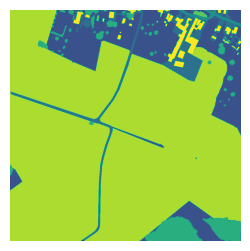

(1000, 1000)

In [4]:
file_path = '../../raw_data/OpenEarthMap_wo_xBD/aachen/labels/aachen_1.tif'
fig = plt.figure(figsize=(3, 3))
y_original = Image.open(file_path)
plt.axis('off')
plt.imshow(y_original)
plt.show()
y_original = np.array(y_original)
y_original.shape

In [6]:
lb = Image.open(label_path)
# Generate array for each label
# Resize each label using image_resize function
resized_label = image_resize(256,256,lb)
# Generate array for each image
numpy_array_label = np.array(resized_label)
# Encode labels
encoded_label = to_categorical(numpy_array_label, num_classes=9)
# Add resized and encoded array to list
label_list_array.append(encoded_label)

In [7]:
image_resize(250, 250, '../../raw_data/OpenEarthMap_wo_xBD/aachen/labels/aachen_1.tif')

AttributeError: 'str' object has no attribute 'resize'